## Grid Search Hyperparameter Tuning for an SVM
In this exercise, we will employ a class of estimator called an SVM classifier and tune its hyperparameters using a grid search strategy.

The supervised learning objective we will focus on here is the classification of handwritten digits (0-9) based solely on images. The dataset we will use contains 1,797 labeled images of handwritten digits.

In [1]:
from sklearn import datasets, svm, model_selection

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


Load the data. We will call this object images, and then we'll isolate the target y and the features X. In the training step, the SVM classifier will learn how y relates to X and will therefore be able to predict new y values when given new X values:

In [2]:
# load data
digits = datasets.load_digits()

# target
y = digits.target

# features
X = digits.data

In [3]:
# support vector mechine classifier
clr = svm.SVC(gamma='scale')

Define our grid to cover four distinct hyperparameterizations of the classifier with a linear kernel and with a polynomial kernel of degrees 2, 3, and 4. We want to see which of the four hyperparameterizations leads to more accurate predictions:

In [4]:
# hyperparameter grid contains linear and polynomial kernels
grid = [{'kernel': ['linear']}, {'kernel': ['poly']}, {'degree': [2, 3, 4]}]

Set up grid search k-fold cross-validation with 10 folds and a scoring measure of accuracy. Make sure it has our grid and estimator objects as inputs

In [5]:
# setting up grid search to score on accuracy and evaluate over 10 folds
cv_spec = model_selection.GridSearchCV(estimator=clr, param_grid=grid,
                                      scoring='accuracy', cv=10)

Start the search by providing data to the .fit() method. Details of the process, including the hyperparameterizations tried and the scoring method selected, will be printed to the screen:

In [6]:
cv_spec.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'kernel': ['linear']}, {'kernel': ['poly']},
                         {'degree': [2, 3, 4]}],
             scoring='accuracy')

In [7]:
cv_spec.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': [{'kernel': ['linear']},
  {'kernel': ['poly']},
  {'degree': [2, 3, 4]}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

To examine all of the results, simply print cv_spec.cv_results_ to the screen. You will see that the results are structured as a dictionary, allowing you to access the information you require using the keys:

In [8]:
# what is the available information
print(cv_spec.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


For this exercise, we are primarily concerned with the test-set performance of each distinct hyperparameterization. You can see the first hyperparameterization through cv_spec.cv_results_['mean_test_score'], and the second through cv_spec.cv_results_['params'].

Let's convert the results dictionary to a pandas DataFrame and find the best hyperparameterization:

In [9]:
# convert dictionary results to pandas dataframe
import pandas as pd
results = pd.DataFrame(cv_spec.cv_results_)

# show hyperparameterizations
print(results.loc[:,['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False))

                 params  mean_test_score
1    {'kernel': 'poly'}         0.977734
2         {'degree': 2}         0.969950
3         {'degree': 3}         0.969950
4         {'degree': 4}         0.969950
0  {'kernel': 'linear'}         0.960487


It is best practice to visualize any results you produce. pandas makes this easy.

<AxesSubplot:ylabel='params'>

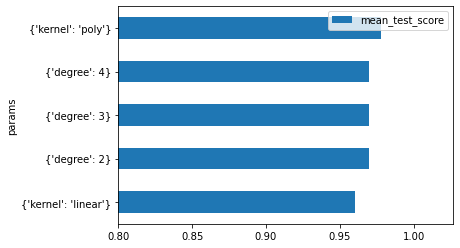

In [11]:
# visualize the result
(results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=True)
.plot.barh(x='params',xlim=(0.8)))